# Capstone project - HealthCare Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
plt.style.use('ggplot')
from cp_clean_helper import benef_new_feats, benef_label_encode, show_values,\
in_out_na_replace, in_new_feats, out_new_feats, inout_label_encode
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

### # Loading training and testing dataset:-

In [2]:
# Train datasets

train_y = pd.read_csv("Data/Train-1542865627584.csv")
train_beneficiary = pd.read_csv("Data/Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv("Data/Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv("Data/Train_Outpatientdata-1542865627584.csv")

# Test datasets

test_provs = pd.read_csv("Data/Test-1542969243754.csv")
test_beneficiary = pd.read_csv("Data/Test_Beneficiarydata-1542969243754.csv")
test_inpatient = pd.read_csv("Data/Test_Inpatientdata-1542969243754.csv")
test_outpatient = pd.read_csv("Data/Test_Outpatientdata-1542969243754.csv")

### # Dataset shapes:-

In [3]:
print('Shape of train_y data :',train_y.shape)
print('Shape of train_beneficiary data :',train_beneficiary.shape)
print('Shape of train_inpatient data :',train_inpatient.shape)
print('Shape of train_outpatient data :',train_outpatient.shape)

print('Shape of test_provs data :',test_provs.shape)
print('Shape of test_beneficiary data :',test_beneficiary.shape)
print('Shape of test_inpatient data :',test_inpatient.shape)
print('Shape of test_outpatient data :',test_outpatient.shape)

Shape of train_y data : (5410, 2)
Shape of train_beneficiary data : (138556, 25)
Shape of train_inpatient data : (40474, 30)
Shape of train_outpatient data : (517737, 27)
Shape of test_provs data : (1353, 1)
Shape of test_beneficiary data : (63968, 25)
Shape of test_inpatient data : (9551, 30)
Shape of test_outpatient data : (125841, 27)


### # Looking at first few rows for each:

- Train data

In [4]:
train_y.head(5)

Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

In [5]:
train_beneficiary.head(5)

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   
2                         2                          2                   2   
3                         1                          2                   2   
4                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           2                       2                     2   
3                           2                       2                     1   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  
0                     70  
1                     50  
2                     40  
3                    760  
4                   1200

In [6]:
train_inpatient.head(5)

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   
3      PHY349768  2009-02-14                   431             1068.0   
4            NaN  2009-08-13                 78321             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   
3  2009-02-22                067              43491               2762   
4  2009-08-30                975                042               3051   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   
3               7843              32723              V1041               4254   
4              34400               5856              42732                486   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3              25062              40390               4019   
4               5119              29620              20300   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN               331.0                 NaN   
4                 NaN              3893.0                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [7]:
train_outpatient.head(5)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0            NaN              78943              V5866              V1272   
1            NaN               6115                NaN                NaN   
2            NaN               2723                NaN                NaN   
3            NaN              71988                NaN                NaN   
4            NaN              82382              30000              72887   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4               4280               7197              V4577                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3                NaN                NaN                 NaN   
4                NaN                NaN                 NaN   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   DeductibleAmtPaid ClmAdmitDiagnosisCode  
0                  0                 56409  
1                  0                 79380  
2                  0                   NaN  
3                  0                   NaN  
4                  0                 71947

- Test data

In [8]:
test_provs.head(5)

Provider
0  PRV51002
1  PRV51006
2  PRV51009
3  PRV51010
4  PRV51018

In [9]:
test_beneficiary.head(5)

BeneID         DOB         DOD  Gender  Race RenalDiseaseIndicator  \
0  BENE11001  1943-01-01         NaN       1     1                     0   
1  BENE11007  1940-09-01  2009-12-01       1     2                     0   
2  BENE11010  1936-07-01         NaN       2     1                     0   
3  BENE11011  1914-03-01         NaN       2     2                     0   
4  BENE11014  1938-04-01         NaN       2     1                     Y   

   State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0     39     230                   12                   12   
1     45     610                   12                   12   
2     41      30                   12                   12   
3      1     360                   12                   12   
4     45     780                   12                   12   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0                      1                         2                          1   
1                      1                         1                          2   
2                      2                         1                          2   
3                      2                         1                          1   
4                      2                         1                          1   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                   2                           2                       1   
1                   2                           2                       2   
2                   1                           1                       2   
3                   2                           2                       1   
4                   2                           1                       1   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                     1                          1                         2   
1                     1                          2                         1   
2                     1                          1                         1   
3                     1                          2                         2   
4                     2                          1                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                1                   2   
2                                2                   2   
3                                1                   1   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                      1490   
2                         0                      0                      1170   
3                      5000                   1068                       250   
4                     21260                   2136                       120   

   OPAnnualDeductibleAmt  
0                     70  
1                    160  
2                    660  
3                    320  
4                    100

In [10]:
test_inpatient.head(5)

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11014  CLM67387   2009-09-09  2009-09-16  PRV57070   
1  BENE11017  CLM31237   2008-12-25  2009-01-08  PRV54750   
2  BENE11026  CLM78930   2009-12-09  2009-12-13  PRV53758   
3  BENE11031  CLM56810   2009-06-23  2009-07-06  PRV55825   
4  BENE11085  CLM34625   2009-01-20  2009-01-31  PRV52338   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    9000          PHY317786          PHY427017   
1                   14000          PHY314656          PHY426644   
2                    2000          PHY349495                NaN   
3                   16000          PHY429538          PHY371893   
4                   19000          PHY397161                NaN   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-09-09                  5789             1068.0   
1            NaN  2008-12-25                  5939             1068.0   
2            NaN  2009-12-09                  4019             1068.0   
3            NaN  2009-06-23                  8208             1068.0   
4            NaN  2009-01-20                  4279             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-09-16                332               5780               5533   
1  2009-01-08                661               1889              41071   
2  2009-12-13                241               4010              78791   
3  2009-07-06                564               8208               4168   
4  2009-01-31                880              29654               V142   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0                496               V420              40390               2851   
1               5990               5601               4588               5845   
2              60000              41401              V1254               4372   
3                920               5990              40391               2859   
4              78702              30503               V140              V4582   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               5990                570              41071   
1               4549              29570              34831   
2              78650               7813               4254   
3               4254              41400               5849   
4              V6109               7242                NaN   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                4280              4443.0              5849.0   
1                 NaN              5551.0                 NaN   
2                 NaN                 NaN                 NaN   
3               41401              8152.0              3320.0   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [11]:
test_outpatient.head(5)

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM392397   2009-06-02  2009-06-02  PRV55962   
1  BENE11001  CLM430760   2009-06-23  2009-06-23  PRV56112   
2  BENE11007  CLM233081   2009-03-07  2009-03-07  PRV56979   
3  BENE11007  CLM496381   2009-07-29  2009-07-29  PRV56573   
4  BENE11007  CLM521391   2009-08-12  2009-08-12  PRV56573   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY347633                NaN   
1                      30          PHY381777                NaN   
2                     200          PHY425311                NaN   
3                      10          PHY393253          PHY347995   
4                      10          PHY417685                NaN   

  OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
0      PHY347633              V5832              V5861               2724   
1      PHY381777               9594              E9174               4019   
2      PHY425311               7248                NaN                NaN   
3            NaN              58889               2449                NaN   
4      PHY382041               V666                NaN                NaN   

  ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0               3182              V5869              42731                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                NaN                NaN                 NaN   
1                NaN                NaN                 NaN   
2                NaN                NaN                 NaN   
3                NaN                NaN                 NaN   
4                NaN                NaN                 NaN   

   ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   ClmProcedureCode_4  ClmProcedureCode_5  ClmProcedureCode_6  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   DeductibleAmtPaid ClmAdmitDiagnosisCode  
0                  0                   NaN  
1                  0                   NaN  
2                  0                   NaN  
3                  0                  5939  
4                  0                   NaN

### # Investigating train and test provider info files:

- Train file with provider IDs and fraudulent or not labels:

In [12]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


- Looking at number of Fraudulent and Non-Fraudulent providers (numerical analysis)

In [13]:
print(train_y['PotentialFraud'].value_counts())
print("*" * 40)
print(train_y['PotentialFraud'].value_counts(normalize=True))

No     4904
Yes     506
Name: PotentialFraud, dtype: int64
****************************************
No     0.90647
Yes    0.09353
Name: PotentialFraud, dtype: float64


- Looking at number of Fraudulent and Non-Fraudulent providers (graphical analysis)

In [14]:
fig = px.histogram(train_y['PotentialFraud'], x='PotentialFraud', color='PotentialFraud',\
                   labels={\
                     "PotentialFraud": "Fraud Labels"},\
                   title="Fraudulent and Non-Fraudulent Providers",text_auto=True)
fig.update_layout(
    yaxis_title="Number of Providers",
        title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=14,
        color="RebeccaPurple"
    ))
fig.show()

In [15]:
fig = px.bar(train_y['PotentialFraud'].value_counts(normalize=True),\
             x='PotentialFraud', color='PotentialFraud',\
             labels={"PotentialFraud": "Percentage of Total"},\
             text=['90.64%','9.35%'], title="Fraudulent and Non-Fraudulent Providers")

fig.update_layout(
    yaxis_title="Fraud Labels",
        title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
font=dict(
        size=14,
        color="RebeccaPurple"
    ))

fig.show()

- Looking at duplicate values

In [16]:
train_y.duplicated().sum()

0

- Looking at null values

In [17]:
train_y.isnull().sum()

Provider          0
PotentialFraud    0
dtype: int64

## # Investigating train and test beneficiary info files:

- Looking at column names for train_beneficiary dataset

In [18]:
train_beneficiary.columns # same columns for test data

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [19]:
train_beneficiary.info()
test_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

- Looking at missing data

<AxesSubplot:>

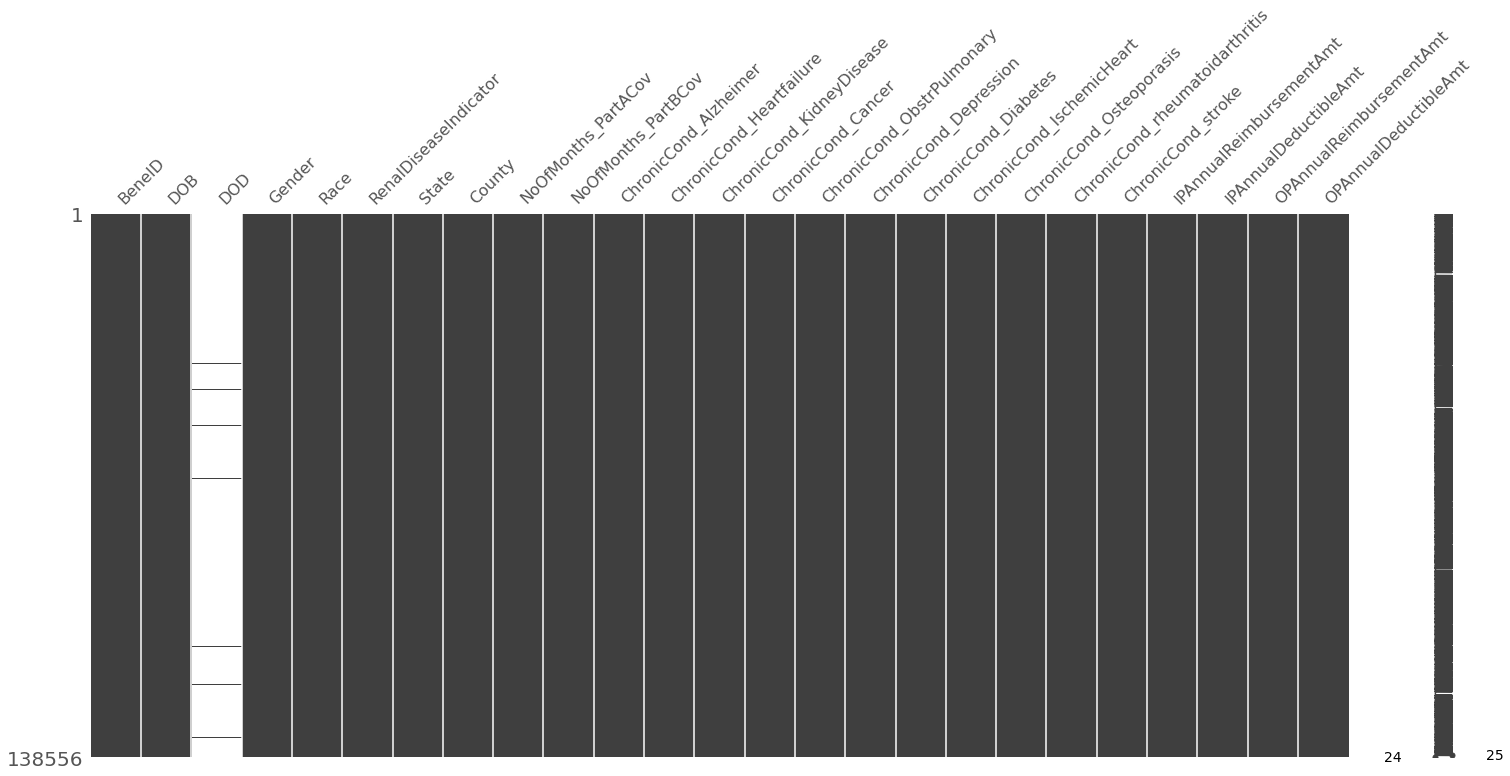

In [20]:
msno.matrix(train_beneficiary)

<AxesSubplot:>

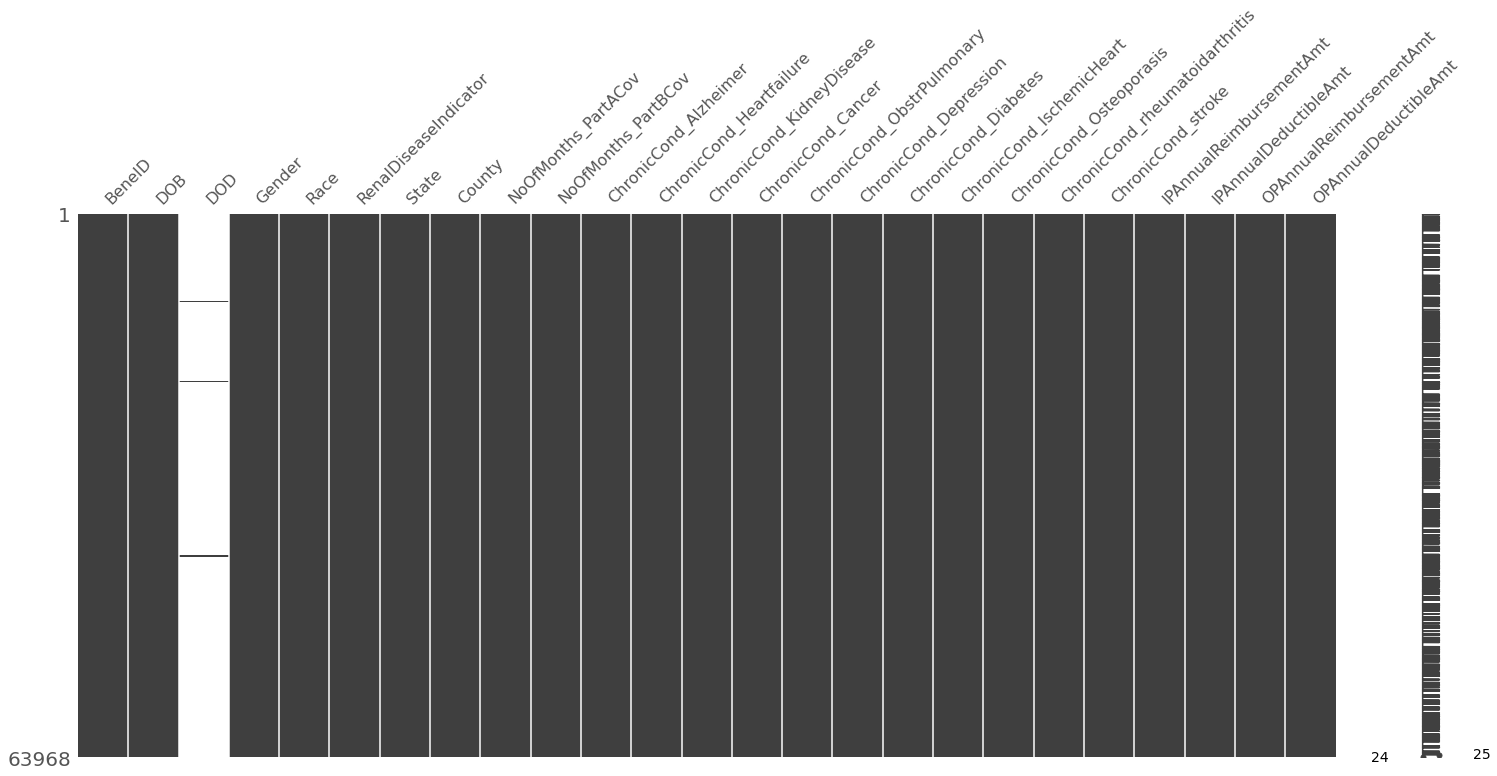

In [21]:
msno.matrix(test_beneficiary)

- Looking at numerical data description

In [22]:
# train_beneficiary.describe()
# test_beneficiary.describe()

## Label encoding both train and test datasets:

- Label encoding some categorical columns

In [23]:
benef_label_encode(train_beneficiary)
benef_label_encode(test_beneficiary)

## Creating new features for beneficiary datasets:

- Created Patient age feature from DOB and DOD

- Created feature stating whether or not the patient has deceased 

- Combined outpatient and inpatient amounts for reimbursement and deductible amounts

In [24]:
benef_new_feats(train_beneficiary)
benef_new_feats(test_beneficiary)

- Dropping DOD and IP/OP reimbursement and deductible columns

In [25]:
train_beneficiary.drop(['DOD','DOB','IPAnnualReimbursementAmt','OPAnnualReimbursementAmt',\
                      'IPAnnualDeductibleAmt','OPAnnualReimbursementAmt'], axis=1, inplace=True)\

test_beneficiary.drop(['DOD','DOB','IPAnnualReimbursementAmt','OPAnnualReimbursementAmt',\
                      'IPAnnualDeductibleAmt','OPAnnualReimbursementAmt'], axis=1, inplace=True)

In [26]:
train_beneficiary.head(5)
# test_beneficiary.head(5)

BeneID  Gender  Race  RenalDiseaseIndicator  State  County  \
0  BENE11001       0     0                      0     39     230   
1  BENE11002       1     0                      0     39     280   
2  BENE11003       0     0                      0     52     590   
3  BENE11004       0     0                      0     39     270   
4  BENE11005       0     0                      0     24     680   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      0   
1                   12                   12                      1   
2                   12                   12                      0   
3                   12                   12                      0   
4                   12                   12                      1   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         1                          0                   1   
1                         1                          1                   1   
2                         1                          1                   1   
3                         0                          1                   1   
4                         1                          1                   1   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           1                       0                     0   
1                           1                       1                     1   
2                           1                       1                     1   
3                           1                       1                     0   
4                           0                       1                     0   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          0                         1   
1                          1                         1   
2                          0                         1   
3                          0                         0   
4                          1                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  OPAnnualDeductibleAmt  \
0                                0                   0                     70   
1                                1                   1                     50   
2                                1                   1                     40   
3                                0                   1                    760   
4                                1                   1                   1200   

   Deceased  Age  Tot_Reimbursed_Amt  Tot_Deductible_Amt  DOB_year  DOB_month  \
0         0   66               36060                3264      1943          1   
1         0   73                  30                  30      1936          9   
2         0   73                  90                  90      1936          8   
3         0   87                1810                1810      1922          7   
4         0   74                1790                1790      1935          9   

   DOB_day  
0        1  
1        1  
2        1  
3        1  
4        1

- Checking number of outliers

<AxesSubplot:>

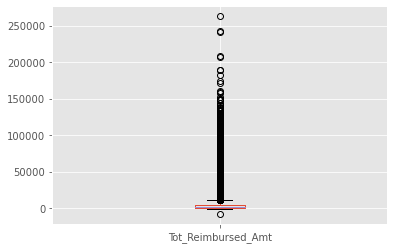

In [27]:
train_beneficiary[['Tot_Reimbursed_Amt']].boxplot()

In [28]:
train_beneficiary.loc[train_beneficiary.Tot_Reimbursed_Amt > 250000,:]

BeneID  Gender  Race  RenalDiseaseIndicator  State  County  \
135300  BENE155688       1     0                      0     19     440   

        NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
135300                   12                   12                      1   

        ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
135300                         0                          0   

        ChronicCond_Cancer  ChronicCond_ObstrPulmonary  \
135300                   1                           1   

        ChronicCond_Depression  ChronicCond_Diabetes  \
135300                       1                     0   

        ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
135300                          0                         1   

        ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
135300                                1                   0   

        OPAnnualDeductibleAmt  Deceased  Age  Tot_Reimbursed_Amt  \
135300                    865         0   90              262720   

        Tot_Deductible_Amt  DOB_year  DOB_month  DOB_day  
135300              103386      1919         12        1

<AxesSubplot:>

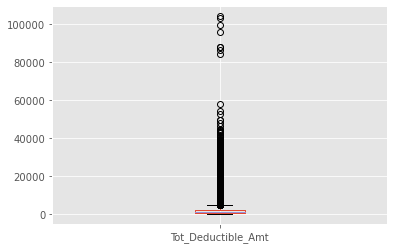

In [29]:
train_beneficiary[['Tot_Deductible_Amt']].boxplot()

<AxesSubplot:>

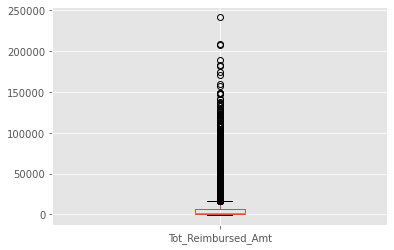

In [30]:
test_beneficiary[['Tot_Reimbursed_Amt']].boxplot()

<AxesSubplot:>

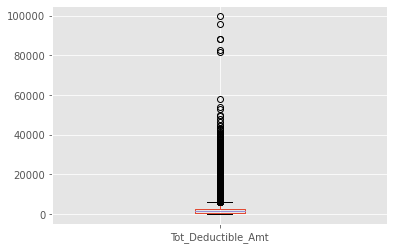

In [31]:
test_beneficiary[['Tot_Deductible_Amt']].boxplot()

Text(0.5, 0, 'Reimbursement Amount (USD)')

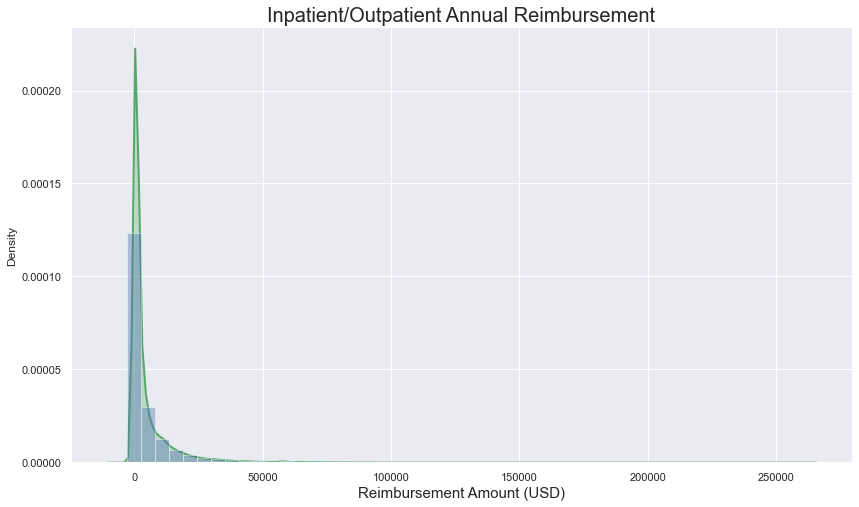

In [32]:
sns.set(rc={"figure.figsize":(14, 8)})
sns.distplot(train_beneficiary["Tot_Reimbursed_Amt"],\
             kde=True, \
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 2, "shade": True})\
            .set_title("Inpatient/Outpatient Annual Reimbursement",fontsize = 20)
plt.xlabel("Reimbursement Amount (USD)", fontsize = 15)

Text(0.5, 0, 'Deductible Amount (USD)')

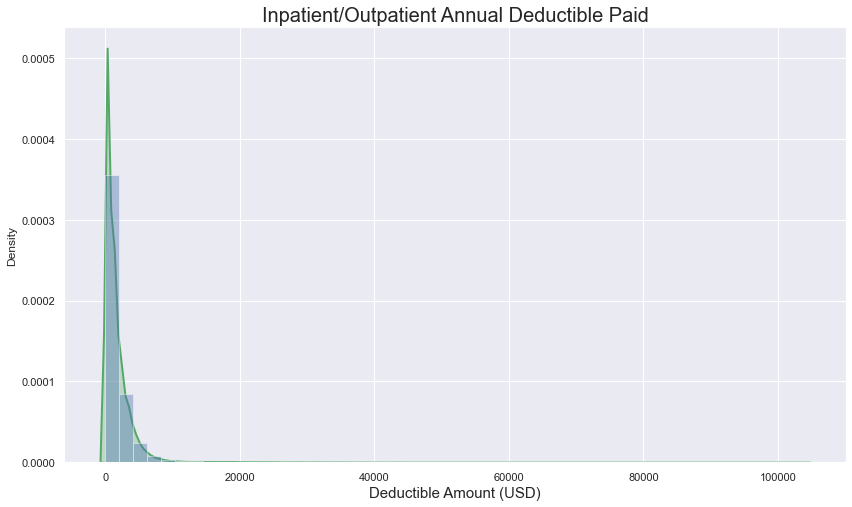

In [33]:
sns.set(rc={"figure.figsize":(14, 8)})
sns.distplot(train_beneficiary["Tot_Deductible_Amt"],\
             kde=True, \
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 2, "shade": True})\
            .set_title("Inpatient/Outpatient Annual Deductible Paid",fontsize = 20)
plt.xlabel("Deductible Amount (USD)", fontsize = 15)

In [34]:
train_beneficiary.loc[train_beneficiary.Tot_Reimbursed_Amt > 150000,:]

BeneID  Gender  Race  RenalDiseaseIndicator  State  County  \
2500     BENE13669       0     1                      0     34     730   
2849     BENE14036       1     1                      0     33     770   
10411    BENE22137       0     0                      1     10     510   
13375    BENE25318       0     0                      0      5     370   
62365    BENE77765       1     0                      0     17     550   
67669    BENE83465       1     0                      1      4     490   
91564   BENE108968       1     0                      0     34     400   
93621   BENE111157       1     1                      0      1     360   
95013   BENE112649       0     0                      1     38     250   
99998   BENE117983       0     0                      1     33     420   
112038  BENE130861       0     0                      0     44     480   
126846  BENE146654       1     0                      0     31     100   
135300  BENE155688       1     0                      0     19     440   
137935  BENE158540       1     1                      1     11     710   

        NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
2500                     12                   12                      1   
2849                     12                   12                      1   
10411                    12                   12                      0   
13375                    12                   12                      1   
62365                    12                   12                      1   
67669                    12                   12                      1   
91564                    12                   12                      1   
93621                    12                   12                      1   
95013                    12                   12                      0   
99998                    12                   12                      0   
112038                   12                    6                      0   
126846                   12                   12                      1   
135300                   12                   12                      1   
137935                   12                   12                      1   

        ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
2500                           0                          1   
2849                           0                          0   
10411                          0                          0   
13375                          0                          1   
62365                          1                          0   
67669                          0                          0   
91564                          0                          1   
93621                          0                          1   
95013                          0                          0   
99998                          0                          0   
112038                         1                          1   
126846                         1                          0   
135300                         0                          0   
137935                         0                          0   

        ChronicCond_Cancer  ChronicCond_ObstrPulmonary  \
2500                     1                           1   
2849                     1                           0   
10411                    0                           0   
13375                    1                           1   
62365                    0                           0   
67669                    1                           1   
91564                    0                           0   
93621                    1                           0   
95013                    1                           0   
99998                    1                           0   
112038                   1                           1   
126846                   0                           0   
135300                   1                           1   
137935           

In [35]:
train_beneficiary.loc[train_beneficiary.Tot_Deductible_Amt > 60000,:]

BeneID  Gender  Race  RenalDiseaseIndicator  State  County  \
2500     BENE13669       0     1                      0     34     730   
13375    BENE25318       0     0                      0      5     370   
62365    BENE77765       1     0                      0     17     550   
91564   BENE108968       1     0                      0     34     400   
93621   BENE111157       1     1                      0      1     360   
112038  BENE130861       0     0                      0     44     480   
126846  BENE146654       1     0                      0     31     100   
135300  BENE155688       1     0                      0     19     440   

        NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
2500                     12                   12                      1   
13375                    12                   12                      1   
62365                    12                   12                      1   
91564                    12                   12                      1   
93621                    12                   12                      1   
112038                   12                    6                      0   
126846                   12                   12                      1   
135300                   12                   12                      1   

        ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
2500                           0                          1   
13375                          0                          1   
62365                          1                          0   
91564                          0                          1   
93621                          0                          1   
112038                         1                          1   
126846                         1                          0   
135300                         0                          0   

        ChronicCond_Cancer  ChronicCond_ObstrPulmonary  \
2500                     1                           1   
13375                    1                           1   
62365                    0                           0   
91564                    0                           0   
93621                    1                           0   
112038                   1                           1   
126846                   0                           0   
135300                   1                           1   

        ChronicCond_Depression  ChronicCond_Diabetes  \
2500                         1                     1   
13375                        1                     1   
62365                        1                     1   
91564                        0                     0   
93621                        0                     0   
112038                       1                     1   
126846                       0                     0   
135300                       1                     0   

        ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
2500                            0                         1   
13375                           0                         1   
62365                           0                         1   
91564                           0                         0   
93621                           0                         1   
112038                          0                         1   
126846                          0                         0   
135300                          0                         1   

        ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
2500                                  1                   1   
13375                                 1                   0   
62365                                 1                   1   
91564                                 1                   1   
93621                                 1                   1   
112038                                1                   0   
126846                                0                   0   
1

Text(0.5, 1.0, 'Top 10 beneficiaries with highest Reimbursement amounts')

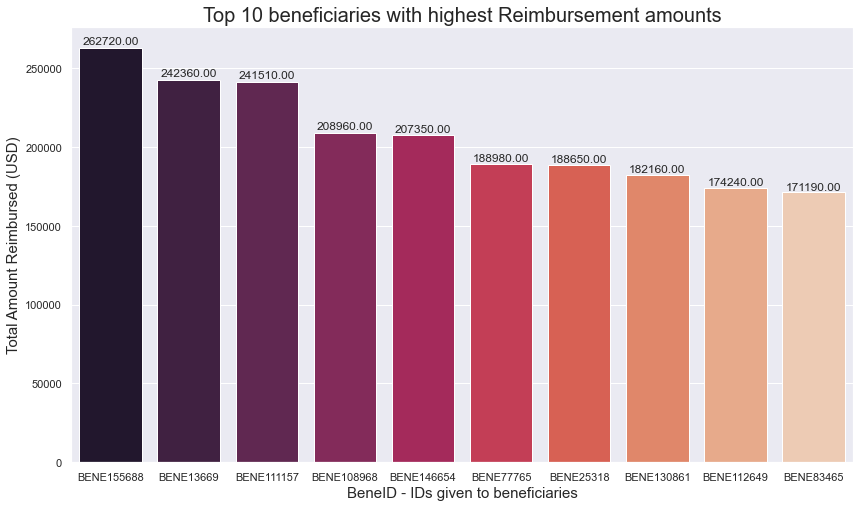

In [36]:
my_order = train_beneficiary.groupby('BeneID')['Tot_Reimbursed_Amt']\
           .median().sort_values(ascending=False).head(10).index
plot = sns.barplot(data=train_beneficiary, x='BeneID', y='Tot_Reimbursed_Amt', order=my_order, palette='rocket')
show_values(plot,space=0.05)
plt.xlabel("BeneID - IDs given to beneficiaries", fontsize = 15)
plt.ylabel("Total Amount Reimbursed (USD)", fontsize = 15)
plt.title("Top 10 beneficiaries with highest Reimbursement amounts", fontsize = 20)

Text(0.5, 1.0, 'Top 10 beneficiaries with highest deductible amounts paid')

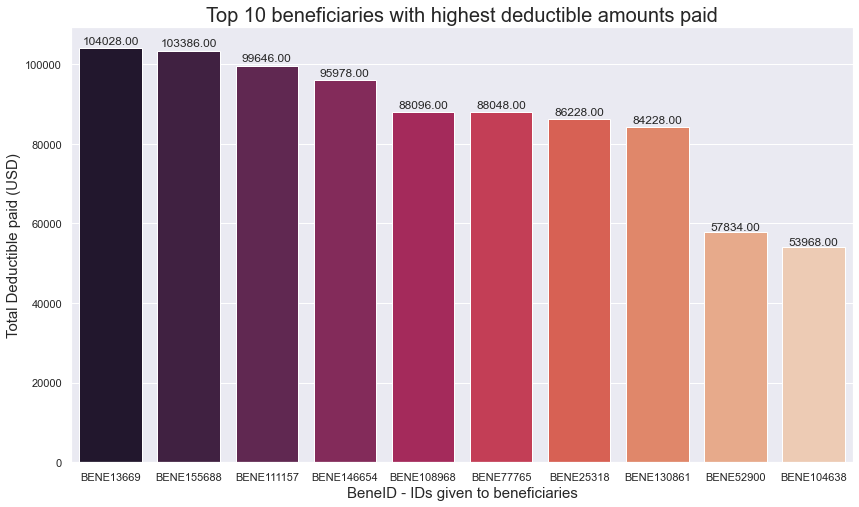

In [37]:
my_order = train_beneficiary.groupby('BeneID')['Tot_Deductible_Amt']\
           .median().sort_values(ascending=False).head(10).index
plot = sns.barplot(data=train_beneficiary, x='BeneID', y='Tot_Deductible_Amt', order=my_order, palette='rocket')
show_values(plot, space=0.05)
plt.xlabel("BeneID - IDs given to beneficiaries", fontsize = 15)
plt.ylabel("Total Deductible paid (USD)", fontsize = 15)
plt.title("Top 10 beneficiaries with highest deductible amounts paid", fontsize = 20)

In [38]:
# my_order = train_beneficiary['Gender'].value_counts().sort_values(ascending=False).index
# plt = sns.catplot('Gender', data=train_beneficiary, aspect=1, kind='count',order=my_order)
# plt.set_xticklabels(step=1)

In [39]:
# my_order = train_beneficiary['Race'].value_counts().sort_values(ascending=False).index
# plt = sns.catplot('Race', data=train_beneficiary, aspect=2, kind='count',order=my_order)
# plt.set_xticklabels(step=1)

In [40]:
# my_order = train_beneficiary['Deceased'].value_counts().sort_values(ascending=False).index
# plt = sns.catplot('Deceased', data=train_beneficiary, kind='count',order=my_order)
# plt.set_xticklabels(step=1)

In [41]:
# my_order = train_beneficiary['RenalDiseaseIndicator'].value_counts().sort_values(ascending=False).index
# plt = sns.catplot('RenalDiseaseIndicator', data=train_beneficiary, kind='count',order=my_order)
# plt.set_xticklabels(step=1)

In [42]:
# my_order = train_beneficiary['State'].value_counts().sort_values(ascending=False).head(5).index
# plt = sns.catplot('State', data=train_beneficiary, aspect=3, kind='count', order=my_order)
# plt.set_xticklabels(step=1)

In [43]:
# my_order = train_beneficiary['County'].value_counts().sort_values(ascending=False).head(5).index
# plt = sns.catplot('County', data=train_beneficiary, aspect=3, kind='count', order=my_order)
# plt.set_xticklabels(step=1)

## Insights about beneficiary train dataset:

- TOP 10 beneficiaries with highest deductible paid:

In [44]:
train_beneficiary.groupby('BeneID')['Tot_Deductible_Amt']\
           .median().sort_values(ascending=False).head(10)

BeneID
BENE13669     104028
BENE155688    103386
BENE111157     99646
BENE146654     95978
BENE108968     88096
BENE77765      88048
BENE25318      86228
BENE130861     84228
BENE52900      57834
BENE104638     53968
Name: Tot_Deductible_Amt, dtype: int64

- TOP 10 beneficiaries with highest reimbursement amount received:

In [45]:
train_beneficiary.groupby('BeneID')['Tot_Reimbursed_Amt']\
           .median().sort_values(ascending=False).head(10)

BeneID
BENE155688    262720
BENE13669     242360
BENE111157    241510
BENE108968    208960
BENE146654    207350
BENE77765     188980
BENE25318     188650
BENE130861    182160
BENE112649    174240
BENE83465     171190
Name: Tot_Reimbursed_Amt, dtype: int64

- Beneficiaries match between both except for last two

- Looking at the conditions that the top beneficiaries have

In [46]:
ds_df = train_beneficiary[['BeneID','RenalDiseaseIndicator','ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',\
                   'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary','ChronicCond_Depression', 'ChronicCond_Diabetes',\
                   'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']]


id_list = ['BENE13669','BENE155688','BENE111157',\
           'BENE146654','BENE108968','BENE77765',\
           'BENE25318','BENE130861']

ds_df[ds_df['BeneID'].isin(id_list)]

BeneID  RenalDiseaseIndicator  ChronicCond_Heartfailure  \
2500     BENE13669                      0                         0   
13375    BENE25318                      0                         0   
62365    BENE77765                      0                         1   
91564   BENE108968                      0                         0   
93621   BENE111157                      0                         0   
112038  BENE130861                      0                         1   
126846  BENE146654                      0                         1   
135300  BENE155688                      0                         0   

        ChronicCond_KidneyDisease  ChronicCond_Cancer  \
2500                            1                   1   
13375                           1                   1   
62365                           0                   0   
91564                           1                   0   
93621                           1                   1   
112038                          1                   1   
126846                          0                   0   
135300                          0                   1   

        ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
2500                             1                       1   
13375                            1                       1   
62365                            0                       1   
91564                            0                       0   
93621                            0                       0   
112038                           1                       1   
126846                           0                       0   
135300                           1                       1   

        ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
2500                       1                          0   
13375                      1                          0   
62365                      1                          0   
91564                      0                          0   
93621                      0                          0   
112038                     1                          0   
126846                     0                          0   
135300                     0                          0   

        ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
2500                           1                                1   
13375                          1                                1   
62365                          1                                1   
91564                          0                                1   
93621                          1                                1   
112038                         1                                1   
126846                         0                                0   
135300                         1                                1   

        ChronicCond_stroke  
2500                     1  
13375                    0  
62365                    1  
91564                    1  
93621                    1  
112038                   0  
126846                   0  
135300                   0

- None of the top common beneficieries have Ischemic Heart or RenalDisease disease. They do however have some of the other Chronic conditions

- Gender encoded with '1' has majority of the beneficiaries

- Most of the beneficiaries are of race 0

- Most of the beneficiaries do not have renal desease and are alive

## # Investigating Train and Test Inpatient info files:

- Looking at column names for train_inpatient dataset

In [47]:
train_inpatient.columns # same columns for test data

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [48]:
train_inpatient.info()
test_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [49]:
print(train_inpatient.shape)
print(test_inpatient.shape)

(40474, 30)
(9551, 30)


- Checking number of outliers

<AxesSubplot:>

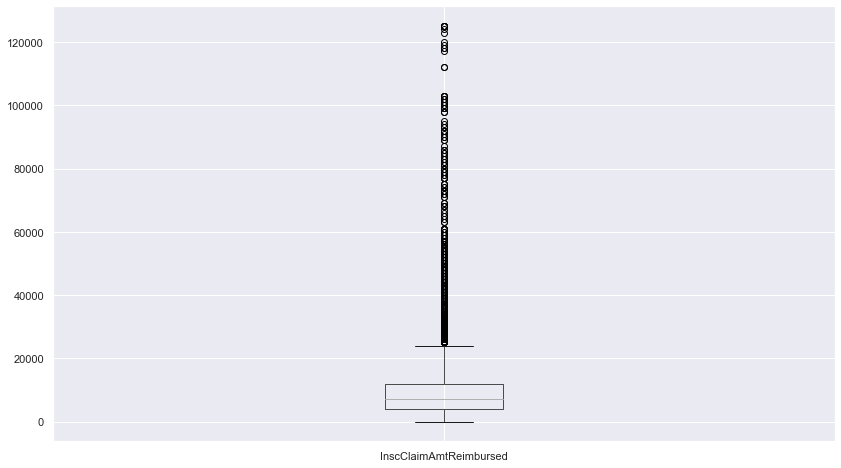

In [50]:
train_inpatient[['InscClaimAmtReimbursed']].boxplot()

<AxesSubplot:>

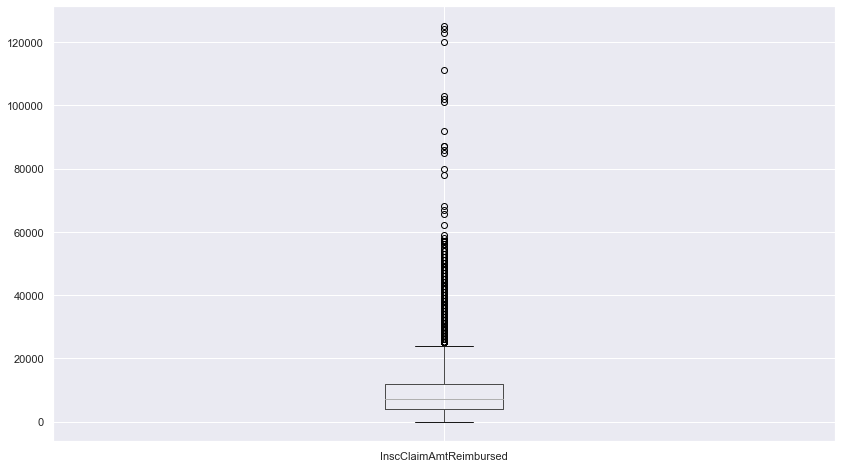

In [51]:
test_inpatient[['InscClaimAmtReimbursed']].boxplot()

<AxesSubplot:>

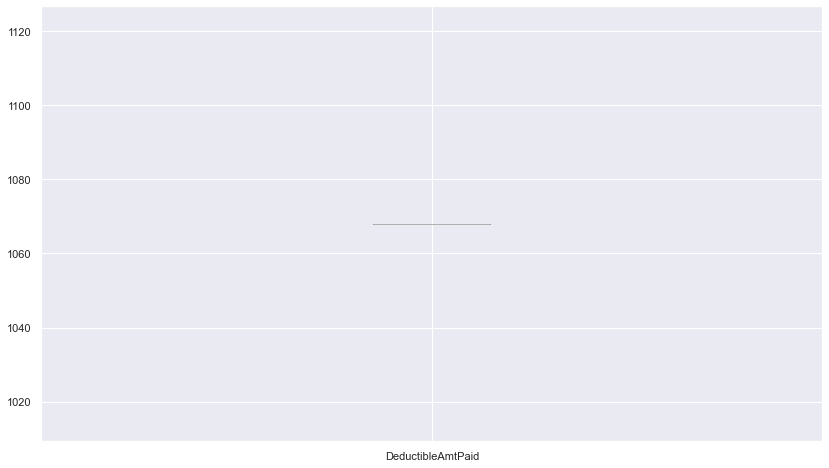

In [52]:
train_inpatient[['DeductibleAmtPaid']].boxplot()

<AxesSubplot:>

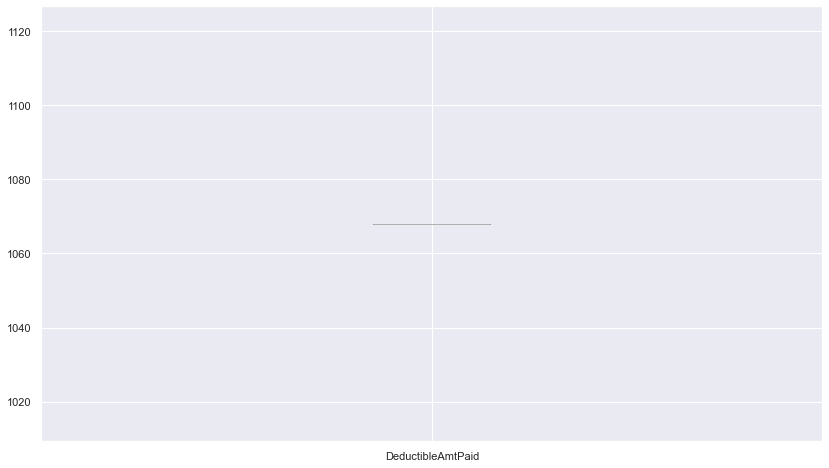

In [53]:
test_inpatient[['DeductibleAmtPaid']].boxplot()

- Removing columns with high null values:

In [54]:
train_inpatient.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)
test_inpatient.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)

In [55]:
print(train_inpatient.shape)
print(test_inpatient.shape)

(40474, 27)
(9551, 27)


- Looking at null values

<AxesSubplot:>

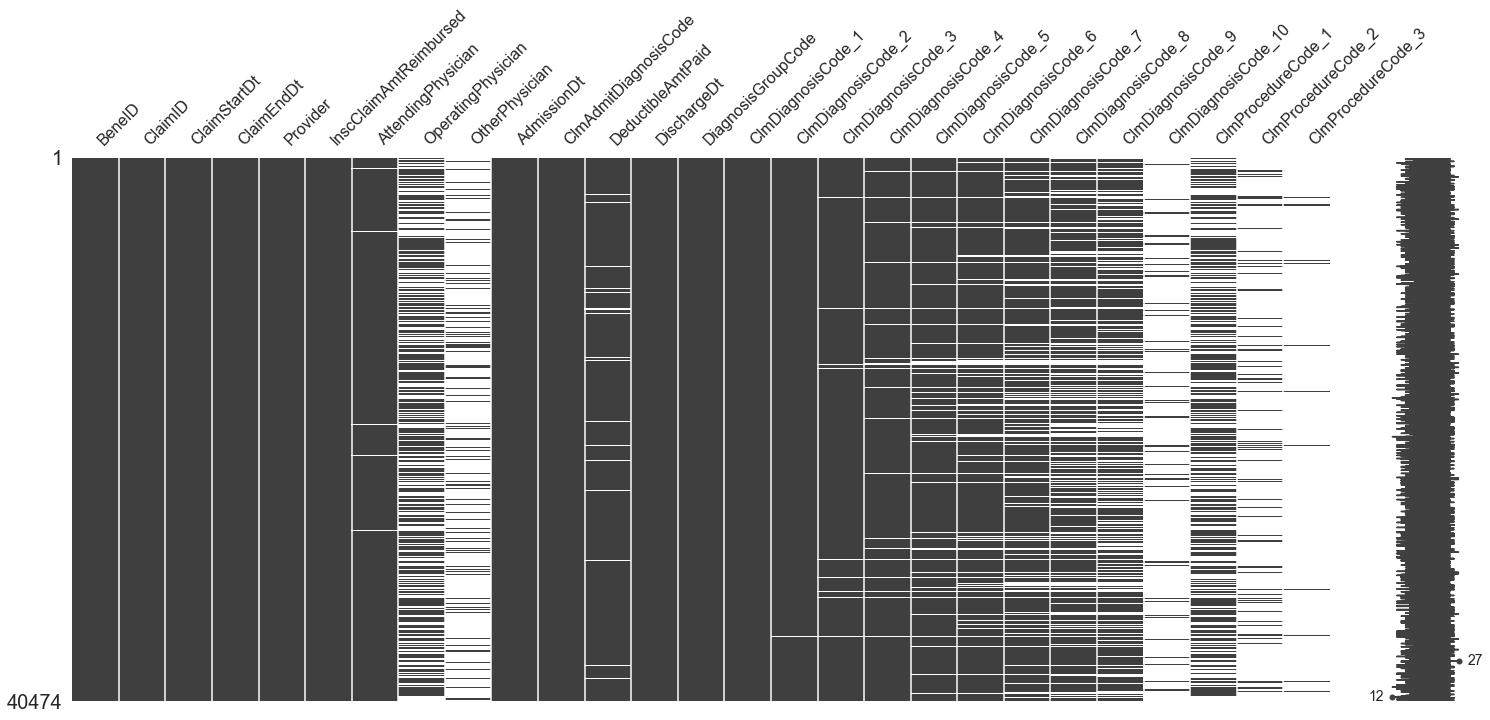

In [56]:
msno.matrix(train_inpatient)

<AxesSubplot:>

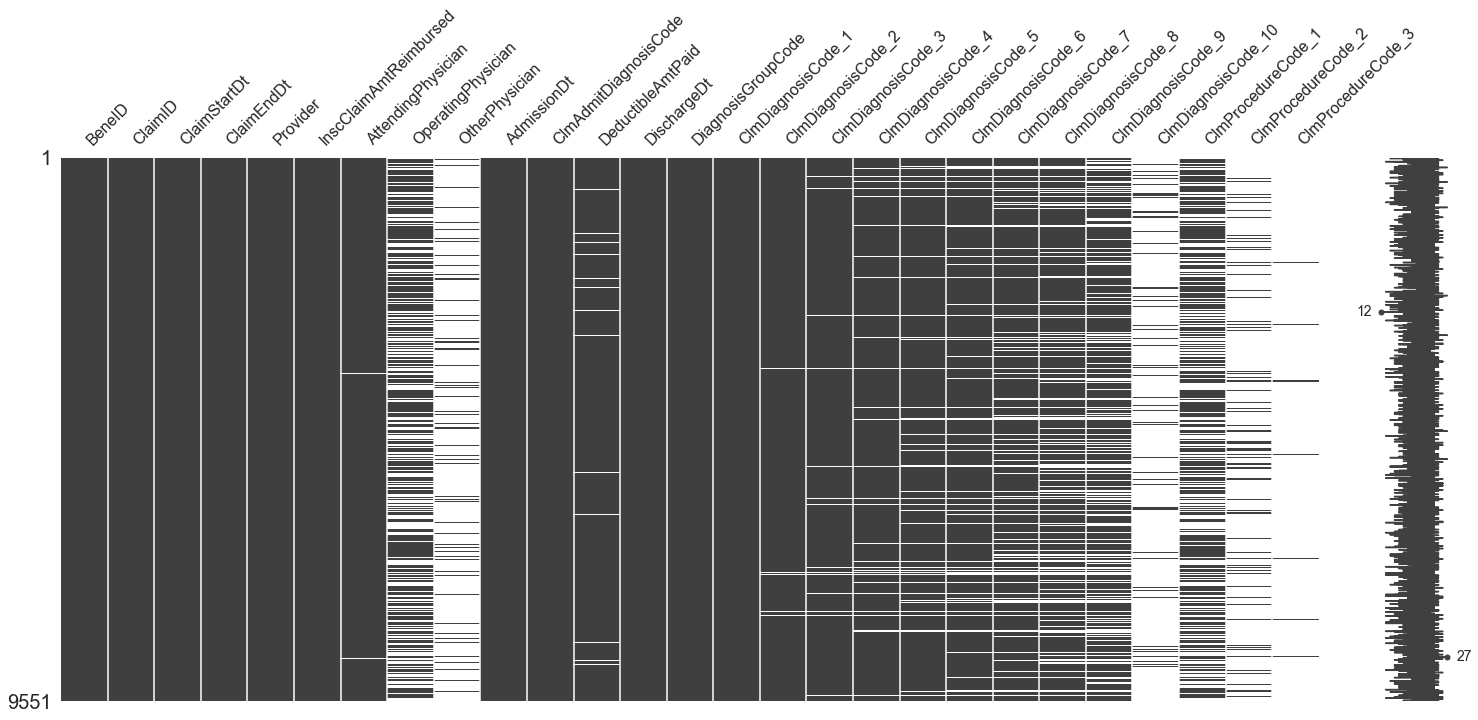

In [57]:
msno.matrix(test_inpatient)

- Imputing null values

In [58]:
in_out_na_replace(train_inpatient)
in_out_na_replace(test_inpatient)

In [59]:
train_inpatient.isnull().sum()

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
AdmissionDt               0
ClmAdmitDiagnosisCode     0
DeductibleAmtPaid         0
DischargeDt               0
DiagnosisGroupCode        0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
dtype: int64

In [60]:
test_inpatient.isnull().sum()

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
AdmissionDt               0
ClmAdmitDiagnosisCode     0
DeductibleAmtPaid         0
DischargeDt               0
DiagnosisGroupCode        0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
dtype: int64

## # Investigating train and test Outpatient info files:

- Looking at column names for train_inpatient dataset

In [61]:
train_outpatient.columns # same columns for test data

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [62]:
train_outpatient.info()
test_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [63]:
print(train_outpatient.shape)
print(test_outpatient.shape)

(517737, 27)
(125841, 27)


- Removing columns with high null values:

In [64]:
train_outpatient.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)
test_outpatient.drop(['ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'], axis=1, inplace=True)

In [65]:
print(train_outpatient.shape)
print(test_outpatient.shape)

(517737, 24)
(125841, 24)


- Looking at null values

<AxesSubplot:>

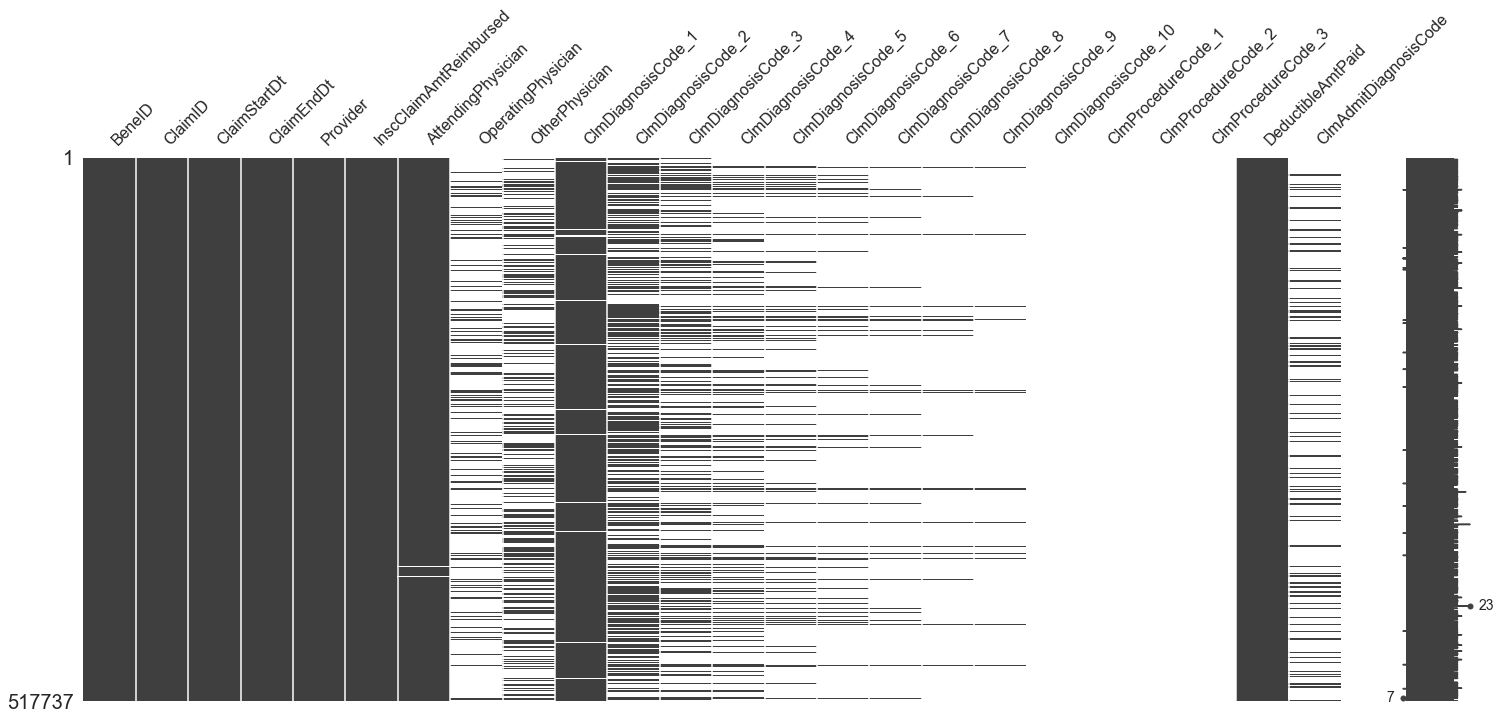

In [66]:
msno.matrix(train_outpatient)

<AxesSubplot:>

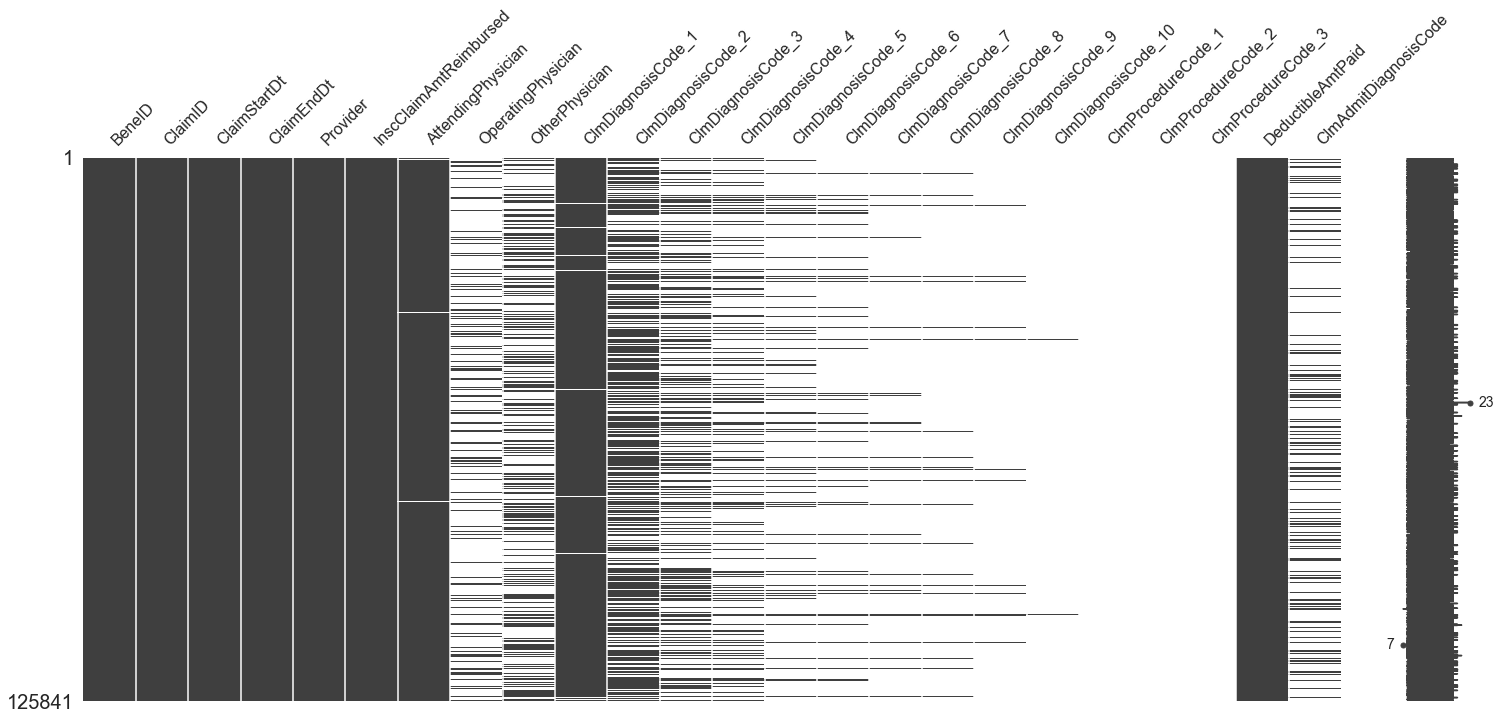

In [67]:
msno.matrix(test_outpatient)

- Imputing null values

In [68]:
in_out_na_replace(train_outpatient)
in_out_na_replace(test_outpatient)

In [69]:
train_outpatient.isnull().sum()

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
DeductibleAmtPaid         0
ClmAdmitDiagnosisCode     0
dtype: int64

In [70]:
test_outpatient.isnull().sum()

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
ClmProcedureCode_3        0
DeductibleAmtPaid         0
ClmAdmitDiagnosisCode     0
dtype: int64

- Looking at outliers

<AxesSubplot:>

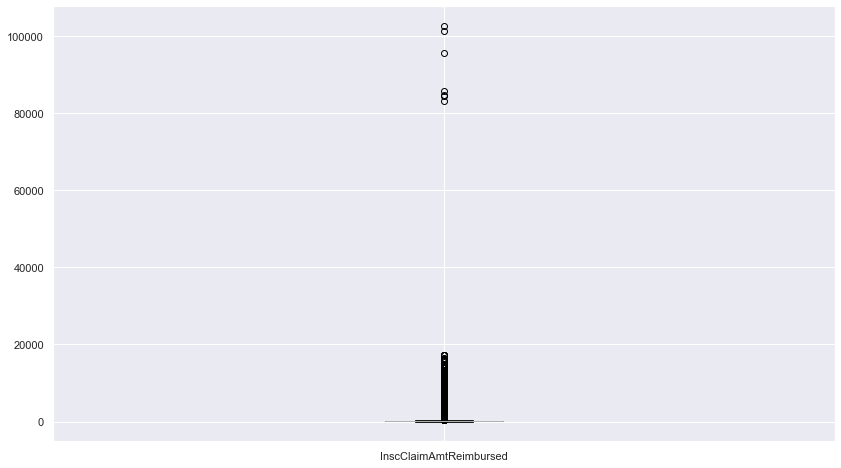

In [71]:
train_outpatient[['InscClaimAmtReimbursed']].boxplot()

<AxesSubplot:>

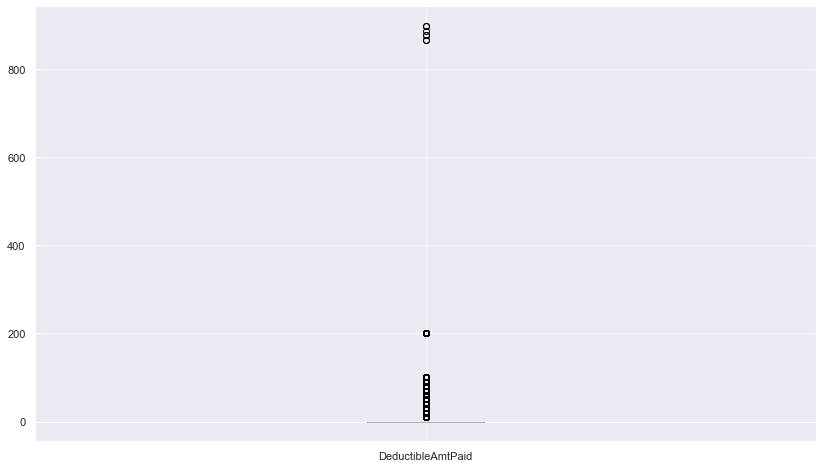

In [72]:
train_outpatient[['DeductibleAmtPaid']].boxplot()

<AxesSubplot:>

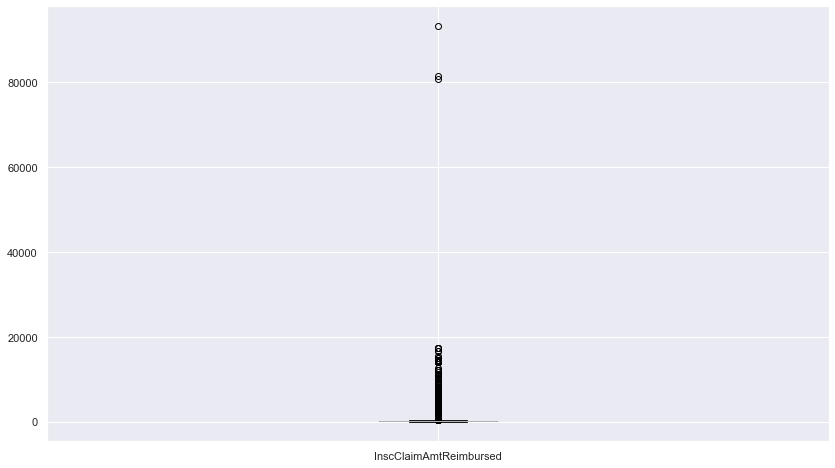

In [73]:
test_outpatient[['InscClaimAmtReimbursed']].boxplot()

<AxesSubplot:>

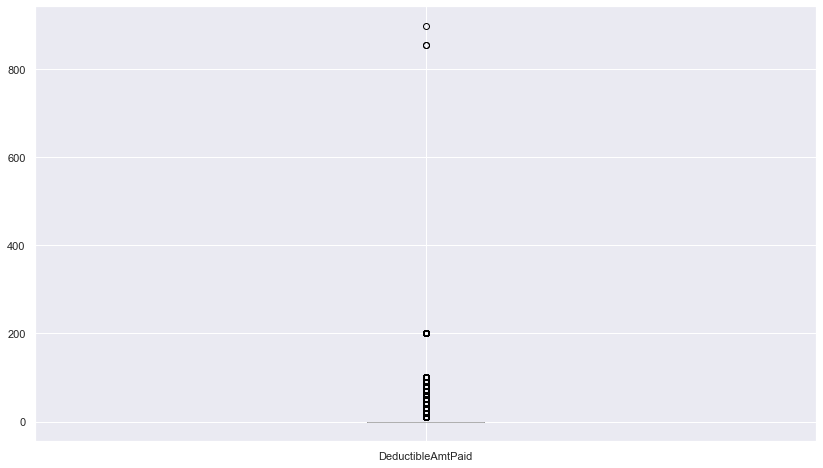

In [74]:
test_outpatient[['DeductibleAmtPaid']].boxplot()

In [75]:
train_outpatient.loc[train_outpatient.InscClaimAmtReimbursed > 80000,:]

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
9326     BENE13669  CLM82013   2009-09-14  2009-10-07  PRV55172   
50435    BENE25318  CLM82009   2009-01-17  2009-01-22  PRV51399   
232849   BENE77765  CLM82012   2009-07-13  2009-07-13  PRV53114   
341672  BENE108968  CLM82011   2009-12-15  2009-12-22  PRV55205   
349263  BENE111157  CLM82006   2008-12-15  2008-12-28  PRV51119   
418824  BENE130861  CLM82014   2009-08-27  2009-09-01  PRV56507   
505756  BENE155688  CLM82010   2009-03-29  2009-04-02  PRV53461   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
9326                    102500          PHY387333          PHY432582   
50435                    84460          PHY355989          PHY371138   
232849                   85680          PHY356002          PHY401806   
341672                   84660          PHY322242          PHY329158   
349263                   95580          PHY409901          PHY396304   
418824                   83160          PHY395085          PHY365635   
505756                  101250          PHY332723          PHY332723   

       OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
9326             None              41011              42832   
50435            None                431               2761   
232849           None              51884              80707   
341672      PHY355985               0389               1629   
349263      PHY396304               0389                486   
418824           None               3962               4168   
505756           None               4280              43411   

       ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
9326                 4239               5570               1122   
50435               30500              78001               4019   
232849              41401              51181               5849   
341672              28731               9348               2761   
349263              78552              70709               0414   
418824               5121              71536              V4581   
505756              41400              E8781              49390   

       ClmDiagnosisCode_6 ClmDiagnosisCode_7 ClmDiagnosisCode_8  \
9326                48282              51881               None   
50435               51881               3315              99739   
232849              49121              42731               None   
341672               2762              78552               4019   
349263              51881              51883               5722   
418824              41402               4412              41401   
505756              V1051              99672              40391   

       ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
9326                 None                None             4573.0   
50435                0380                2639              239.0   
232849               None                None             9671.0   
341672               5990                None             9672.0   
349263              99591                2762             9672.0   
418824              53081                None             3522.0   
505756              04111                None               51.0   

       ClmProcedureCode_2 ClmProcedureCode_3  DeductibleAmtPaid  \
9326               3811.0               None                876   
50435                None               None                876   
232849               None               None                897   
341672               None               None                886   
349263             5119.0               None                865   
418824             9971.0               None                897   
505756               None               None                865   

       ClmAdmitDiagnosisCode  
9326                   85186  
50435                   3315  
232849                 51881  
341672                  0389  
349263                 51881  
418824                  4241  
505756              

In [76]:
train_outpatient.loc[train_outpatient.DeductibleAmtPaid > 800,:]

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
9326     BENE13669  CLM82013   2009-09-14  2009-10-07  PRV55172   
50435    BENE25318  CLM82009   2009-01-17  2009-01-22  PRV51399   
232849   BENE77765  CLM82012   2009-07-13  2009-07-13  PRV53114   
341672  BENE108968  CLM82011   2009-12-15  2009-12-22  PRV55205   
349263  BENE111157  CLM82006   2008-12-15  2008-12-28  PRV51119   
418824  BENE130861  CLM82014   2009-08-27  2009-09-01  PRV56507   
505756  BENE155688  CLM82010   2009-03-29  2009-04-02  PRV53461   

        InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
9326                    102500          PHY387333          PHY432582   
50435                    84460          PHY355989          PHY371138   
232849                   85680          PHY356002          PHY401806   
341672                   84660          PHY322242          PHY329158   
349263                   95580          PHY409901          PHY396304   
418824                   83160          PHY395085          PHY365635   
505756                  101250          PHY332723          PHY332723   

       OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
9326             None              41011              42832   
50435            None                431               2761   
232849           None              51884              80707   
341672      PHY355985               0389               1629   
349263      PHY396304               0389                486   
418824           None               3962               4168   
505756           None               4280              43411   

       ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
9326                 4239               5570               1122   
50435               30500              78001               4019   
232849              41401              51181               5849   
341672              28731               9348               2761   
349263              78552              70709               0414   
418824               5121              71536              V4581   
505756              41400              E8781              49390   

       ClmDiagnosisCode_6 ClmDiagnosisCode_7 ClmDiagnosisCode_8  \
9326                48282              51881               None   
50435               51881               3315              99739   
232849              49121              42731               None   
341672               2762              78552               4019   
349263              51881              51883               5722   
418824              41402               4412              41401   
505756              V1051              99672              40391   

       ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
9326                 None                None             4573.0   
50435                0380                2639              239.0   
232849               None                None             9671.0   
341672               5990                None             9672.0   
349263              99591                2762             9672.0   
418824              53081                None             3522.0   
505756              04111                None               51.0   

       ClmProcedureCode_2 ClmProcedureCode_3  DeductibleAmtPaid  \
9326               3811.0               None                876   
50435                None               None                876   
232849               None               None                897   
341672               None               None                886   
349263             5119.0               None                865   
418824             9971.0               None                897   
505756               None               None                865   

       ClmAdmitDiagnosisCode  
9326                   85186  
50435                   3315  
232849                 51881  
341672                  0389  
349263                 51881  
418824                  4241  
505756              

In [77]:
test_outpatient.loc[train_outpatient.InscClaimAmtReimbursed > 80000,:]

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
9326   BENE21851  CLM192751   2009-02-13  2009-02-13  PRV55014   
50435  BENE69984  CLM182887   2009-02-08  2009-02-08  PRV53707   

       InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
9326                      100          PHY324182          PHY324182   
50435                     600          PHY397412          PHY397412   

      OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
9326       PHY394400               4011               5853               None   
50435      PHY404411              78959               None               None   

      ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
9326                None               None               None   
50435               None               None               None   

      ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
9326                None               None               None   
50435               None               None               None   

      ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
9326                 None               None               None   
50435                None               None               None   

      ClmProcedureCode_3  DeductibleAmtPaid ClmAdmitDiagnosisCode  
9326                None                  0                  None  
50435               None                  0                 78959

In [78]:
test_outpatient.loc[train_outpatient.DeductibleAmtPaid > 800,:]

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
9326   BENE21851  CLM192751   2009-02-13  2009-02-13  PRV55014   
50435  BENE69984  CLM182887   2009-02-08  2009-02-08  PRV53707   

       InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
9326                      100          PHY324182          PHY324182   
50435                     600          PHY397412          PHY397412   

      OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
9326       PHY394400               4011               5853               None   
50435      PHY404411              78959               None               None   

      ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
9326                None               None               None   
50435               None               None               None   

      ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
9326                None               None               None   
50435               None               None               None   

      ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
9326                 None               None               None   
50435                None               None               None   

      ClmProcedureCode_3  DeductibleAmtPaid ClmAdmitDiagnosisCode  
9326                None                  0                  None  
50435               None                  0                 78959

## Inpatient/Outpatient files EDA

- All rows in inpatient and outpatient data are unique insurance claims:

In [79]:
print(train_inpatient['ClaimID'].unique().shape)
print(train_outpatient['ClaimID'].unique().shape)

(40474,)
(517737,)


- Looking at common doctors with claims in both inpatient and outpatient datasets

In [80]:
# Number of unique Inpatient doctors:

inp_at_doctors = pd.DataFrame(train_inpatient['AttendingPhysician'].value_counts()\
                              .sort_values(ascending=False)).reset_index()
inp_at_doctors.columns=['Physician_ID', 'Inpatient_Claims']

# Number of unique Outpatient doctors:

out_at_doctors = pd.DataFrame(train_outpatient['AttendingPhysician'].value_counts()\
                              .sort_values(ascending=False)).reset_index()
out_at_doctors.columns=['Physician_ID', 'Outpatient_Claims']

# Creating a dataset to look at common doctors that provide both inpatient and outpatient service and
# have claims in both:

common_doc_df = inp_at_doctors.merge(out_at_doctors, on='Physician_ID')
common_doc_df.drop(common_doc_df.index[[6]], inplace=True)
common_doc_df = common_doc_df.sort_values(by=['Inpatient_Claims', 'Outpatient_Claims'],\
                                          ascending=[False, False])
common_doc_df

Physician_ID  Inpatient_Claims  Outpatient_Claims
0       PHY315112               208                  1
1       PHY412508               165                  1
2       PHY404394               153                  1
3       PHY339670               148                  1
4       PHY332294               116                  1
...           ...               ...                ...
3636    PHY355237                 1                  1
3637    PHY371202                 1                  1
3640    PHY323354                 1                  1
3649    PHY367009                 1                  1
3650    PHY323240                 1                  1

[3650 rows x 3 columns]

- Distinct Beneficiaries

In [81]:
print(train_beneficiary['BeneID'].unique().shape)
print(train_inpatient['BeneID'].unique().shape)
print(train_outpatient['BeneID'].unique().shape)

(138556,)
(31289,)
(133980,)


In [82]:
# Inpatient = looking at maximum reimbursement received and deductible amount paid per provider: 

in_reim_deduc_max = train_inpatient[['Provider','InscClaimAmtReimbursed','DeductibleAmtPaid']]\
                        .groupby('Provider').agg(['max']).reset_index()

in_reim_deduc_max.columns=['Hospital_ID', 'Max_Reimbursement', 'Max_Deductible_paid']
in_reim_deduc_max = in_reim_deduc_max.sort_values(by=['Max_Reimbursement', 'Max_Deductible_paid'],\
                                                  ascending=[False, False]).head(10)
in_reim_deduc_max

Hospital_ID  Max_Reimbursement  Max_Deductible_paid
644     PRV52815             125000               1068.0
851     PRV53461             125000               1068.0
1169    PRV54742             125000               1068.0
1334    PRV55172             125000               1068.0
1584    PRV56044             125000               1068.0
1249    PRV54942             124000               1068.0
556     PRV52467             123000               1068.0
1930    PRV57173             120000               1068.0
896     PRV53706             119000               1068.0
48      PRV51119             118000               1068.0

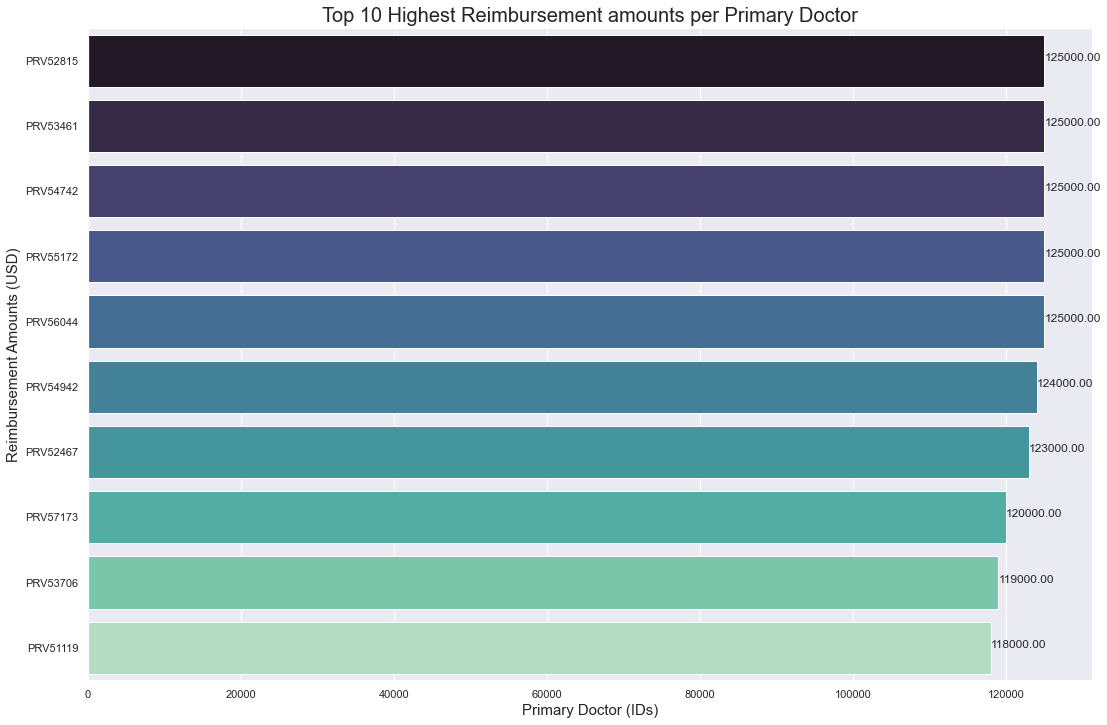

In [83]:
plt.figure(figsize=(18,12))
values = in_reim_deduc_max['Max_Reimbursement']
p = sns.barplot(x="Max_Reimbursement", y="Hospital_ID",\
            data=in_reim_deduc_max, palette='mako')

show_values(p, "h", space=0)
plt.xlabel("Primary Doctor (IDs)", fontsize = 15)
plt.ylabel("Reimbursement Amounts (USD)", fontsize = 15)
plt.title("Top 10 Highest Reimbursement amounts per Primary Doctor", fontsize = 20)
plt.show()

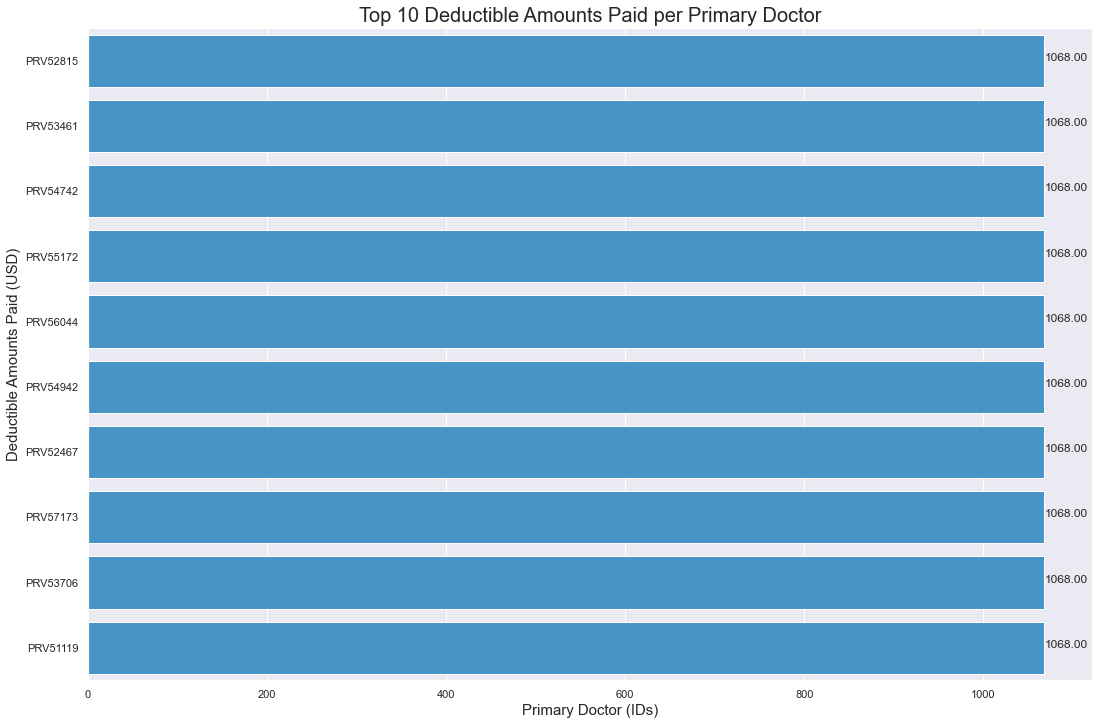

In [84]:
plt.figure(figsize=(18,12))
p = sns.barplot(x="Max_Deductible_paid", y="Hospital_ID",\
                    data=in_reim_deduc_max, color ="#3498db")
show_values(p, "h", space=0)
plt.xlabel("Primary Doctor (IDs)", fontsize = 15)
plt.ylabel("Deductible Amounts Paid (USD)", fontsize = 15)
plt.title("Top 10 Deductible Amounts Paid per Primary Doctor", fontsize = 20)
plt.show()

In [85]:
# Outpatient = looking at maximum reimbursement received and deductible amount paid per provider: 

out_reim_deduc_max = train_outpatient[['Provider','InscClaimAmtReimbursed','DeductibleAmtPaid']]\
                        .groupby('Provider').agg(['max']).reset_index()

out_reim_deduc_max.columns=['Hospital_ID', 'Max_Reimbursement', 'Max_Deductible_paid']
out_reim_deduc_max = out_reim_deduc_max.sort_values(by=['Max_Reimbursement', 'Max_Deductible_paid'],\
                                                    ascending=False).head(10)
out_reim_deduc_max

Hospital_ID  Max_Reimbursement  Max_Deductible_paid
3092    PRV55172             102500                  876
1848    PRV53461             101250                  865
82      PRV51119              95580                  865
1580    PRV53114              85680                  897
3119    PRV55205              84660                  886
290     PRV51399              84460                  876
4091    PRV56507              83160                  897
1218    PRV52631              17300                  200
3735    PRV56020              17300                  200
4820    PRV57518              17300                  100

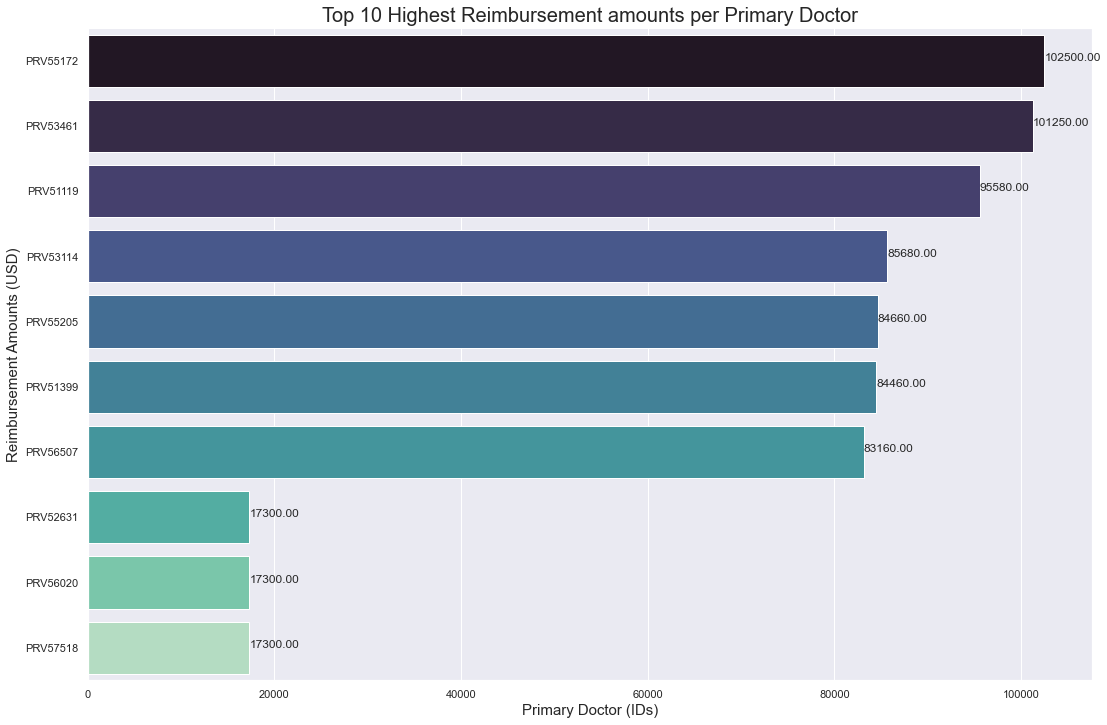

In [86]:
plt.figure(figsize=(18,12))
p=sns.barplot(x="Max_Reimbursement", y="Hospital_ID",\
            data=out_reim_deduc_max, palette='mako')
show_values(p, "h", space=0)
plt.xlabel("Primary Doctor (IDs)", fontsize = 15)
plt.ylabel("Reimbursement Amounts (USD)", fontsize = 15)
plt.title("Top 10 Highest Reimbursement amounts per Primary Doctor", fontsize = 20)
plt.show()

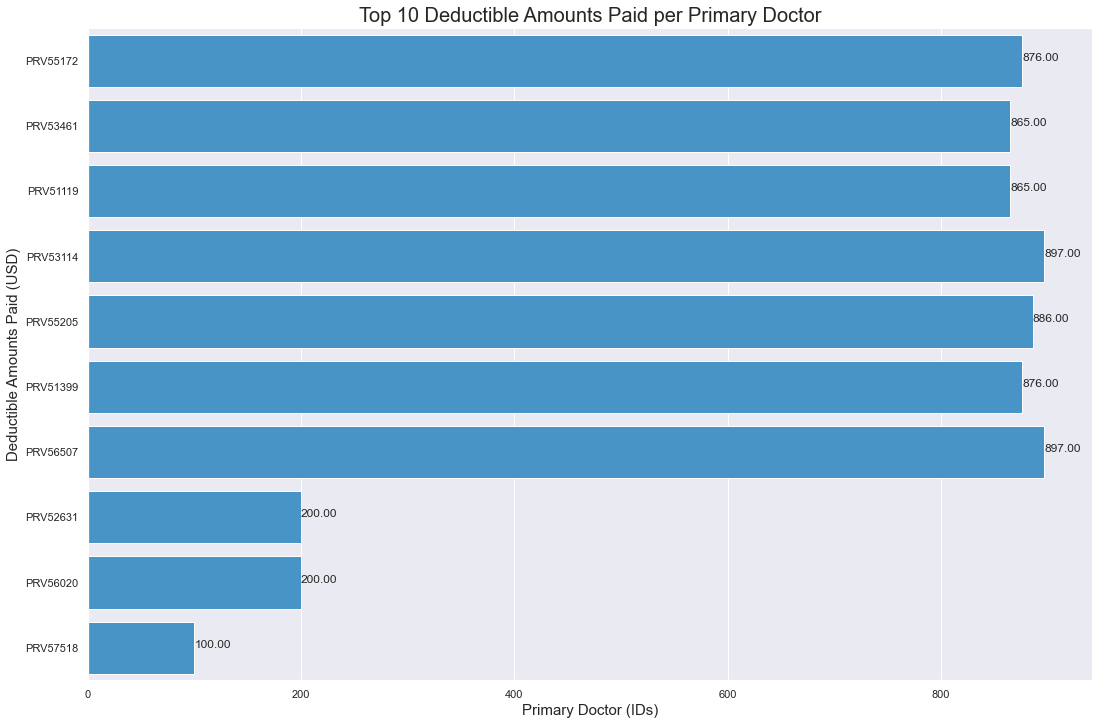

In [87]:
plt.figure(figsize=(18,12))
p=sns.barplot(x="Max_Deductible_paid", y="Hospital_ID",\
                    data=out_reim_deduc_max, color ="#3498db")
show_values(p, "h", space=0)
plt.xlabel("Primary Doctor (IDs)", fontsize = 15)
plt.ylabel("Deductible Amounts Paid (USD)", fontsize = 15)
plt.title("Top 10 Deductible Amounts Paid per Primary Doctor", fontsize = 20)
plt.show()

In [88]:
# Looking at number of hospitals each beneficiary has made a claim at

in_bene_prov = pd.DataFrame(train_inpatient.groupby('BeneID')['Provider'].\
                 count().sort_values(ascending=False)).reset_index()
in_bene_prov.columns =['Beneficiaries', 'No. of Inpatient Hospitals with claims']
in_bene_prov.head(10)

Beneficiaries  No. of Inpatient Hospitals with claims
0    BENE134170                                       8
1     BENE64791                                       7
2    BENE119457                                       7
3    BENE121796                                       7
4     BENE62091                                       7
5    BENE117116                                       7
6     BENE31905                                       6
7     BENE13119                                       6
8     BENE78733                                       6
9     BENE55873                                       6

In [89]:
# Looking at number of hospitals each beneficiary has made a claim at

out_bene_prov = pd.DataFrame(train_outpatient.groupby('BeneID')['Provider'].\
                 count().sort_values(ascending=False)).reset_index()
out_bene_prov.columns =['Beneficiaries', 'No. of Outpatient Hospitals with claims']
out_bene_prov.head(10)

Beneficiaries  No. of Outpatient Hospitals with claims
0     BENE42721                                       29
1    BENE118316                                       29
2     BENE63544                                       27
3     BENE59303                                       27
4    BENE143400                                       27
5     BENE63504                                       27
6     BENE36330                                       26
7     BENE44241                                       26
8     BENE87248                                       25
9     BENE40202                                       25

In [90]:
# Do any beneficiaries have both inpatient and outpatient claims?

common_ben_df = in_bene_prov.merge(out_bene_prov, on='Beneficiaries').\
                             sort_values(by=['No. of Inpatient Hospitals with claims',\
                                             'No. of Outpatient Hospitals with claims']\
                                         ,ascending=[False, False])

common_ben_df

Beneficiaries  No. of Inpatient Hospitals with claims  \
0        BENE134170                                       8   
1         BENE64791                                       7   
4         BENE62091                                       7   
3        BENE121796                                       7   
5        BENE117116                                       7   
...             ...                                     ...   
26680    BENE150624                                       1   
26681    BENE150621                                       1   
26697    BENE150866                                       1   
26698    BENE150860                                       1   
26712     BENE99995                                       1   

       No. of Outpatient Hospitals with claims  
0                                            6  
1                                           13  
4                                            8  
3                                            5  
5                                            5  
...                                        ...  
26680                                        1  
26681                                        1  
26697                                        1  
26698                                        1  
26712                                        1  

[26713 rows x 3 columns]

In [91]:
# Hospitals that inpatient doctors are associated with:

in_bene_prov = pd.DataFrame(train_inpatient.groupby('AttendingPhysician')['Provider'].\
                 count().sort_values(ascending=False)).reset_index().head(10)
in_bene_prov.columns =['Primary_Doctor', 'Affiliated_Hospitals']
in_bene_prov

Primary_Doctor  Affiliated_Hospitals
0      PHY422134                   386
1      PHY341560                   274
2      PHY315112                   208
3      PHY411541                   198
4      PHY431177                   195
5      PHY362864                   195
6      PHY429938                   180
7      PHY314410                   173
8      PHY429828                   168
9      PHY400274                   167

Text(0.5, 1.0, 'Top 10 Inpatient Doctors affiliated with most Hospitals')

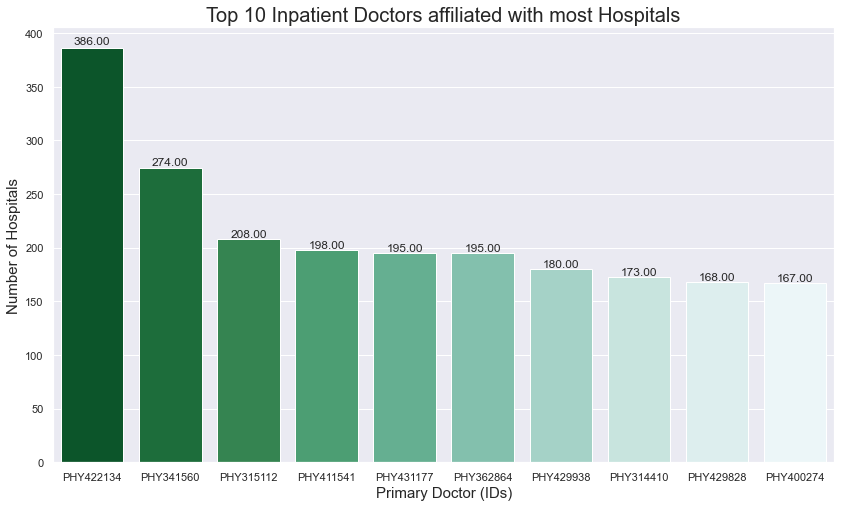

In [92]:
plot = sns.barplot(data=in_bene_prov, x='Primary_Doctor', y='Affiliated_Hospitals', palette="BuGn_r")
show_values(plot)
plt.xlabel("Primary Doctor (IDs)", fontsize = 15)
plt.ylabel("Number of Hospitals", fontsize = 15)
plt.title("Top 10 Inpatient Doctors affiliated with most Hospitals", fontsize = 20)

In [93]:
# Hospitals that outpatient dictors are associated with:

out_bene_prov = pd.DataFrame(train_outpatient.groupby('AttendingPhysician')['Provider'].\
                 count().sort_values(ascending=False)).reset_index().head(10)
out_bene_prov.columns =['Primary_Doctor', 'Affiliated_Hospitals']
out_bene_prov.drop(common_doc_df.index[[2]], inplace=True)
out_bene_prov

Primary_Doctor  Affiliated_Hospitals
0      PHY330576                  2534
1      PHY350277                  1628
3      PHY412132                  1321
4      PHY423534                  1223
5      PHY314027                  1200
6      PHY327046                  1181
7      PHY338032                  1158
8      PHY337425                  1156
9      PHY357120                  1156

Text(0.5, 1.0, 'Top 10 Outpatient Doctors affiliated with most Hospitals')

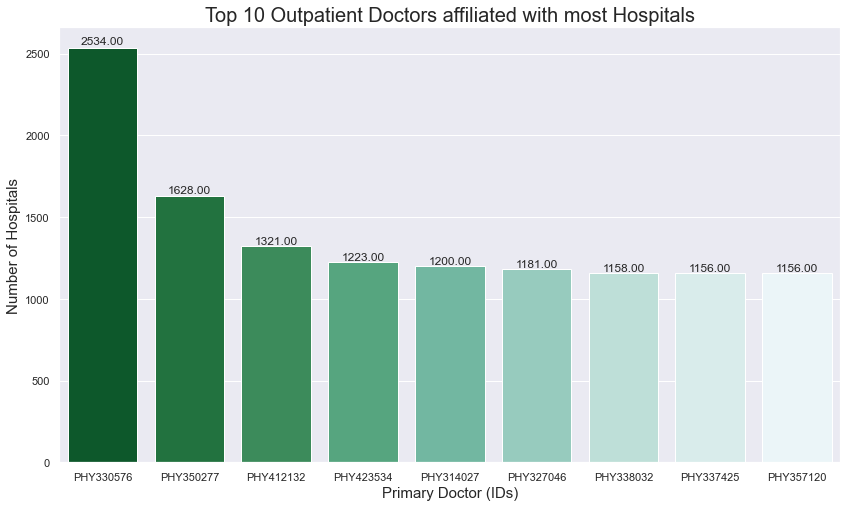

In [94]:
plot = sns.barplot(data=out_bene_prov, x='Primary_Doctor', y='Affiliated_Hospitals', palette="BuGn_r")
show_values(plot)
plt.xlabel("Primary Doctor (IDs)", fontsize = 15)
plt.ylabel("Number of Hospitals", fontsize = 15)
plt.title("Top 10 Outpatient Doctors affiliated with most Hospitals", fontsize = 20)

In [95]:
df1 = pd.DataFrame(train_inpatient.groupby(['BeneID', 'Provider'])['ClmDiagnosisCode_1']\
               .value_counts().sort_values(ascending=False))
df1.columns = ['Code_Counts']
# df1 = df1.reset_index()
# df1.columns = ['Beneficiary_ID','Hospital_ID','Diagnosis_Code','Code_Counts']
df1

Code_Counts
BeneID     Provider ClmDiagnosisCode_1             
BENE29013  PRV51951 49121                         3
BENE119908 PRV57191 80502                         2
BENE75003  PRV52630 49121                         2
BENE156866 PRV57409 9694                          2
BENE69202  PRV52173 00845                         2
...                                             ...
BENE145735 PRV56350 29640                         1
BENE145736 PRV55911 42823                         1
BENE14574  PRV53781 49121                         1
                    99681                         1
BENE99995  PRV56123 V5789                         1

[40405 rows x 1 columns]

In [96]:
df2 = pd.DataFrame(train_outpatient.groupby(['BeneID', 'Provider'])['ClmDiagnosisCode_1']\
                .value_counts().sort_values(ascending=False))
df2.columns = ['Code_Counts']
# df2 = df2.reset_index()
# df2.columns = ['Beneficiary_ID','Hospital_ID','Diagnosis_Code','Code_Counts']
df2

Code_Counts
BeneID     Provider ClmDiagnosisCode_1             
BENE57412  PRV52982 V560                          4
BENE19912  PRV53900 V4512                         4
BENE137175 PRV55265 4011                          4
BENE31954  PRV55467 5856                          4
BENE115962 PRV51574 4011                          4
...                                             ...
BENE145630 PRV57375 7915                          1
           PRV57356 72812                         1
                    2722                          1
           PRV52499 42731                         1
BENE99999  PRV57336 185                           1

[515358 rows x 1 columns]

## Creating new features for inpatient/outpatient datasets:

- Created Hospital Stay in days feature from AdmissionDt and DischargeDt

- Created Claim duration in days feature from ClaimStartDt and ClaimEndDt 

- Created a feature listing the month and year the beneficiary made claim

- Added a feature calculating insurance covered percentages

- Added a feature calculating total claim amount

- Count features: Physician Count, Provider Count and Claims Count

In [97]:
in_new_feats(train_inpatient)
in_new_feats(test_inpatient)
out_new_feats(train_outpatient)
out_new_feats(test_outpatient)

- Dropping ClaimStartDt, ClaimEndDt, AdmissionDt and DischargeDt columns

In [98]:
train_inpatient.drop(['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt'], axis=1, inplace=True)\

test_inpatient.drop(['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt'], axis=1, inplace=True)

train_outpatient.drop(['ClaimStartDt','ClaimEndDt'], axis=1, inplace=True)\

test_outpatient.drop(['ClaimStartDt','ClaimEndDt'], axis=1, inplace=True)

- Concatenating inpatient and outpatient datasets (train and test):

In [99]:
train_in_out_df = pd.concat([train_inpatient, train_outpatient],axis=0,ignore_index=True)
test_in_out_df = pd.concat([test_inpatient, test_outpatient],axis=0,ignore_index=True)

- Imputing null values and changing dtype to int for Hospital_stay

In [100]:
# Train data
train_in_out_df['Hospital_Stay'] = train_in_out_df['Hospital_Stay'].fillna(0)
train_in_out_df['Hospital_Stay'] = train_in_out_df['Hospital_Stay'].astype(int)

# Test data
test_in_out_df['Hospital_Stay'] = test_in_out_df['Hospital_Stay'].fillna(0)
test_in_out_df['Hospital_Stay'] = test_in_out_df['Hospital_Stay'].astype(int)

- Label encoding code/ID columns:

In [101]:
inout_label_encode(train_in_out_df)
inout_label_encode(test_in_out_df)

- Merging beneficiary data with in_out train and test data

In [102]:
train_features = train_beneficiary.merge(train_in_out_df, on='BeneID')
test_features = test_beneficiary.merge(test_in_out_df, on='BeneID')

- Merging provider fraud labels with features train data

In [103]:
train_df = train_features.merge(train_y, on='Provider')

## Saving clean files:

In [104]:
# train_df.to_csv('clean_train.csv')
# test_features.to_csv('clean_test.csv')